## [Lab 5] Logistic Regression

> Logistic Regression is a statistical model that models the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome. It is widely used in various fields such as medicine, finance, and marketing for tasks like predicting whether a patient has a disease, determining credit risk, or classifying customer behavior.


---

> The **goal** of this labaratory session is to implement the logistic regression from scratch, understand the key components of the algorithm, and visualize the optimization process.

---


>The dataset that we are going to use, has three columns, and it represents students' admission to university based on results from two exams. The first column is the score from the first exam, the second column is the score for the second exam, and the third column is 0 (not admitted) or 1 (admitted).
You can either download it from the Google Drive [link](https://drive.google.com/file/d/1CNJzsqsMWWMD1BTUKE5A69ENrBYYAc58/view?usp=sharing), or from the LMS.

Visual representation of the dataset can be found on the figure below.

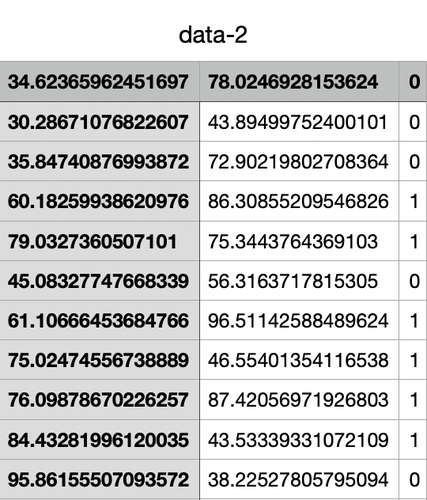


#### 0. Notes


*   $ 𝑋 $ is a data matrix where the first column should be a column vector of ones in order to be able to multiply the X matrix with the column vector of theta parameters. $ Y $ is the label, or the expected output.
*   Your $ \theta $ value initally can be $ [0, 0, 0] $.

* Prepare the matrix methods that we coded a few weeks before : ). More specifically, *concat*, *transpose*, and *generate*.


### 1.   Read and Write operations on a file
In order to analyze and work with our dataset, firstly, we need to read its content. You can use the following code snippet. Additionally, you can use the helper *is_number* function, to handle possible non-numeric values in the columns.

In [1]:
def is_number(s):
    if s is None: return False
    try:
        complex(s)
    except ValueError:
        return False

    return True

def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = []
            lines = file.readlines()

            keys = lines[0].split(',')
            for i in range(1, len(lines)):
                data_row = [
                    float(cell.strip('\n')) if is_number(cell.strip('\n')) else cell.strip('\n')
                    for cell in lines[i].split(',')
                ]
                data.append(data_row)
            return data
    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

In [83]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = []
            keys = None

            # Read each line in the file
            for i, line in enumerate(file):
                # Strip trailing newline character
                line = line.rstrip('\n')

                # Split the line by comma
                cells = line.split(',')

                # If it's  in the first line, store column names
                if i == 0:
                    keys = cells
                else:
                    # Converting numeric values to float
                    for j, cell in enumerate(cells):
                        if is_number(cell):
                            cells[j] = float(cell)
                    data.append(cells)

        return keys, data

    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")



In [6]:
''' data = read_file('C:Desktop/Machine Learning/logistic-regression-dataset.csv')
print(data) '''

" data = read_file('C:Desktop/Machine Learning/logistic-regression-dataset.csv')\nprint(data) "

 > This method is pretty self explanatory. It is checking the size of the list. If list contains elements and if they are of the right type, number of rows and columns for a provided list A is returned.

In [7]:
def size(A):
    rows = len(A)

    if rows > 0:
        if type(A[0]) != list:
            raise RuntimeError('matrix should be list of lists')

        cols = len(A[0])
        return rows, cols
    else:
        return 0, 0

In [8]:
def size(A):
    if not isinstance(A, list):
        raise ValueError("Input must be a list")

    if len(A) == 0:
        return 0, 0

    num_cols = len(A[0])
    if not all(isinstance(row, list) and len(row) == num_cols for row in A):
        raise ValueError("All elements in the input list must be lists of the same length")

    return len(A), num_cols

In [9]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
rows, cols = size(A)
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 3
Number of columns: 3


Another method that may be useful for you is the *column* method below. It is used to extract all rows from a specific column from the dataset. No wonder that it takes matrix and the column index as the parameters. This will be benefitial for taking the features and label columns from the dataset.

In [10]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [11]:
def column(matrix,i):
  return [row[i] for row in matrix]

matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]

result = column(matrix, 1)
print(result)

[2, 5, 8]


In [12]:
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]

result = column(matrix, 1)
print(result)

[2, 5, 8]


#### 2.0. Logistic Regression Hypothesis
> Logistic Regression Hypothesis is a sigmoid function. It limits the cost function to a value between 0 and 1, making linear functions unsuitable for this task. This makes this function an excellent candidate for designing the system for binary classification where the output of the function can be mapped into discrete values. Hypothesis for the logistic regression model is expressed using the following equation:

> $ h(x) = \text{sigmoid}(\mathbf{\theta}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^T \mathbf{x}}} $, ($ -z = X × \theta $), where $\theta$ represents the adjustable parameters of the model that can be adjusted during the training phase and $ x$ represent the input features (it would most probably be a vector, but it can take a scalar value as well).

In [13]:
def calculate_hypothesis(z):
  pass

In [16]:
import math 

def sigmoid(z):
    if z < 0:
        return 1 / (1 + math.exp(z))
    else:
        return 1 / (1 + math.exp(-z))

def calculate_hypothesis(z):
    return sigmoid(z)

In [17]:
z = 1
hypothesis = calculate_hypothesis(z)
print("Hypothesis:", hypothesis)

Hypothesis: 0.7310585786300049


### 2.1. Logistic Regression Cost Function

> The cost function for linear regression is shown in the equation below. This equation represents the classical mean square error between actual and predicted output. It encourages the model to produce high probabilities for positive examples and low probabilities for negative examples.

> $ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] $


In [18]:
def logistic_reg_cost(theta, X, Y):
  pass

In [19]:
import math

def logistic_reg_cost(theta, X, Y):
    m = len(Y)
    cost = 0

    for i in range(m):
        z = sum(theta[j] * X[i][j] for j in range(len(theta)))
        h = sigmoid(z)

        epsilon = 1e-10
        h = max(epsilon, min(1 - epsilon, h))

        cost += Y[i] * math.log(h) + (1 - Y[i]) * math.log(1 - h)

    return -cost / m


In [20]:
theta = [0.5, 0.7]
X = [[1, 2], [1, 3], [1, 4]]
Y = [0, 1, 0]
cost = logistic_reg_cost(theta, X, Y)
print("Cost:", cost)

Cost: 1.8157502363737634


### 2.2. Logistic Regression Delta Cost
> This function should compute the first partial derivatives of the cost function, which will be used in the Gradient Descent to minimize the cost function.

> $ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $

In [21]:
def logistic_reg_delta_cost(theta, X, Y):
  pass

In [22]:
def logistic_reg_delta_cost(theta, X, Y):
    m = len(Y)  # Number of training examples
    n = len(X[0])  # Number of features
    delta_cost = [0] * n

    for j in range(n):
        for i in range(m):
            z = sum(theta[k] * X[i][k] for k in range(len(theta)))
            h = sigmoid(z)
            delta_cost[j] += (h - Y[i]) * X[i][j]

        delta_cost[j] /= m

    return delta_cost

In [23]:
theta = [0.5, 0.7]
X = [[1, 2], [1, 3], [1, 4]]
Y = [0, 1, 0]
delta_cost = logistic_reg_delta_cost(theta, X, Y)
print("Delta Cost:", delta_cost)

Delta Cost: [0.5883939720070064, 1.7966943443844727]


### 2.3. Training the Logistic Regression Model
> Now, all that is left to do is to train the model. You can adjust the learning rate and number of iterations according to your preference. We apply the Gradient Descent algorithm to constantly update the values of $\theta$.

> A bit of a **tip**: you should update the parameters theta using gradient descent: $\theta = \theta - \alpha × gradient $.


In [24]:
def train_logistic_reg(X,
                     Y,
                     theta,
                     learning_rate,
                     num_iterations = 500,
                     logging = False):
  pass

In [25]:
def train_logistic_reg(X, Y, theta, learning_rate, num_iterations=500, logging=False):
    m = len(Y)
    costs = []

    for iteration in range(num_iterations):
        delta_cost = logistic_reg_delta_cost(theta, X, Y)

        for j in range(len(theta)):
            theta[j] -= learning_rate * delta_cost[j]


        if logging:
            cost = logistic_reg_cost(theta, X, Y)
            costs.append(cost)

    return theta, costs



In [26]:
theta = [0.5, 0.7]
X = [[1, 2], [1, 3], [1, 4]]
Y = [0, 1, 0]
learning_rate = 0.01
trained_theta, costs = train_logistic_reg(X, Y, theta, learning_rate, num_iterations=1000, logging=True)
print("Trained Theta:", trained_theta)
print("Costs during training:", costs)

Trained Theta: [-5.758670124554817, -18.127176487084533]
Costs during training: [1.7801147996771913, 1.7449170981188085, 1.7101744855100165, 1.6759044468368967, 1.6421245299239429, 1.608852270319803, 1.5761051095944918, 1.5439003073816433, 1.512254847656564, 1.4811853399083, 1.4507079160375558, 1.420838123987389, 1.3915908192841488, 1.362980055825747, 1.3350189773958732, 1.3077197114989063, 1.2810932671938642, 1.2551494386501856, 1.2298967161478014, 1.2053422061948382, 1.1814915623359636, 1.1583489280729842, 1.1359168931190329, 1.1141964639634467, 1.0931870494433749, 1.0728864617095306, 1.053290932648199, 1.034395145491528, 1.016192281025665, 0.9986740775033285, 0.9818309030950217, 0.9656518394805764, 0.9501247749973413, 0.9352365056278727, 0.920972842030673, 0.9073187207919814, 0.8942583181021257, 0.8817751641317862, 0.8698522564953075, 0.8584721713325448, 0.8476171707095773, 0.8372693052238436, 0.8274105108929949, 0.8180226996018604, 0.809087842572087, 0.8005880464990592, 0.792505622

### 2.4. Visualization & Plotting

> As a last task, you should create a plot of your cost function as a function of the number of iterations.

In [27]:
import matplotlib.pyplot as plt

In [28]:

def visualize_costs(costs):
    plt.plot(range(len(costs)), costs, marker='o')
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()


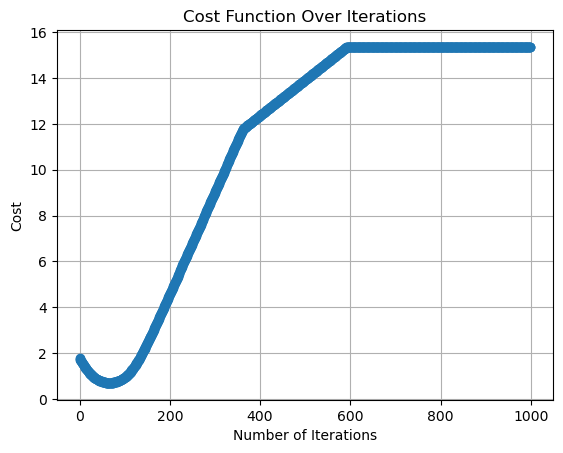

In [29]:
visualize_costs(costs)


### 2.5. Confusion Matrix
> Confusion matrices represent counts from predicted and actual values. The output “TN” stands for True Negative which shows the number of negative examples classified accurately. Similarly, “TP” stands for True Positive which indicates the number of positive examples classified accurately. The term “FP” shows False Positive value, i.e., the number of actual negative examples classified as positive; and “FN” means a False Negative value which is the number of actual positive examples classified as negative.

>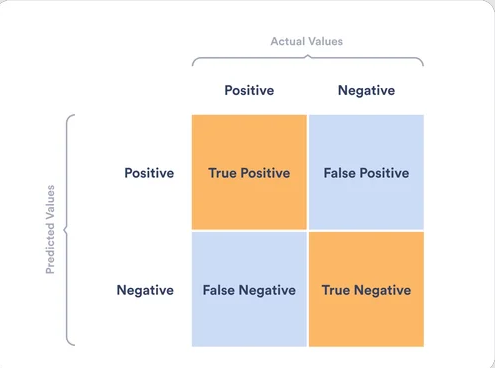

In [30]:
def confusion_matrix(y_pred, y_actual):
  pass

In [31]:
def confusion_matrix(y_pred, y_actual):

    TP, TN, FP, FN = 0, 0, 0, 0

    for pred, actual in zip(y_pred, y_actual):
        if pred == 1 and actual == 1:
            TP += 1
        elif pred == 0 and actual == 0:
            TN += 1
        elif pred == 1 and actual == 0:
            FP += 1
        elif pred == 0 and actual == 1:
            FN += 1

    confusion_matrix = {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    }

    return confusion_matrix


In [32]:
y_pred = [1, 0, 1, 0, 1]
y_actual = [1, 1, 0, 0, 1]
matrix = confusion_matrix(y_pred, y_actual)
print(matrix)


{'TP': 2, 'TN': 1, 'FP': 1, 'FN': 1}


### 3.1. Underfitting & Regularization

> Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. Simply said, the model is working too well.

>The cost function can be extended with some extra penalty factors that will be used to stop the model from overfitting.
Below, you can find the necessary formulas representing the Lasso regularization.

> 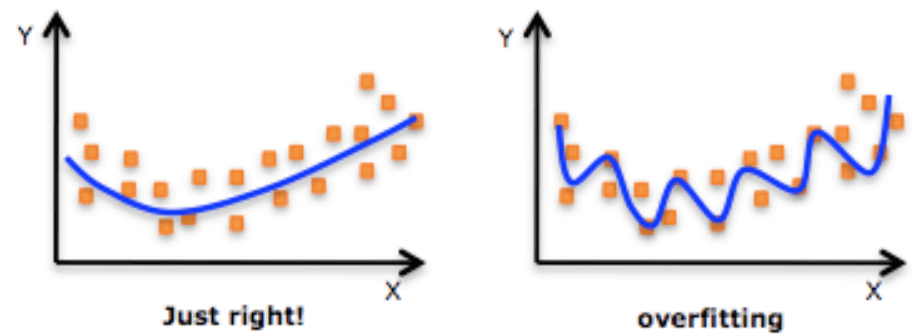



*   Cost function: $ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}|\theta_j | $
*   First partial derivative: $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\cdot\text{sign}(\theta_j)$



The idea behind regularization is that couple of parameters $ \theta$  are penalized more than others in order to avoid usage of all parameters inside of the model. This leads to a simpler model which then blocks the model to overfit. So the cost function is just extended by one part where the parameter $ \lambda$ is called the regularization factor and the $ n $ is a number of the attributes that we want to regularize. Update your existing functions to utilize the Lasso regularization.

In [33]:
def logistic_reg_cost(theta, X, Y, lambda, n):
  pass

SyntaxError: invalid syntax (1041889814.py, line 1)

In [34]:
def logistic_reg_cost(theta, X, Y, lambda_val, n):

    m = len(Y)
    cost = 0

    for i in range(m):
        z = sum(theta[j] * X[i][j] for j in range(len(theta)))
        h = sigmoid(z)
        cost += Y[i] * math.log(h) + (1 - Y[i]) * math.log(1 - h)

    regularization_term = (lambda_val / (2 * m)) * sum(abs(theta[j]) for j in range(1, n+1))
    cost += regularization_term

    return -cost / m


In [35]:
theta = [0.5, 0.2, -0.1]
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Y = [0, 1, 0]
lambda_val = 0.1
n = len(theta) - 1

cost = logistic_reg_cost(theta, X, Y, lambda_val, n)

print("Cost function value:", cost)

Cost function value: 1.7780694524372507


In [36]:
def logistic_reg_delta_cost(theta, X, Y, lambda, n):
  pass

SyntaxError: invalid syntax (3805236469.py, line 1)

In [37]:
def logistic_reg_delta_cost(theta, X, Y, lambda_val, n):
    m = len(Y)
    delta_cost = [0] * len(theta)

    for j in range(len(theta)):
        regularization_term = (lambda_val * theta[j]) / (m * abs(theta[j]))
        sum_term = sum((sigmoid(sum(theta[i] * X[k][i] for i in range(len(theta)))) - Y[k]) * X[k][j] for k in range(m))
        delta_cost[j] = (sum_term / m) + regularization_term

    return delta_cost


In [38]:
delta_cost = logistic_reg_delta_cost(theta, X, Y, lambda_val, n)
print("Delta Cost:", delta_cost)

Delta Cost: [2.436515766132398, 2.9524189588119314, 3.4016554848247984]


In [39]:
def train_logistic_reg(X,
                     Y,
                     theta,
                     lambda,
                     n,
                     learning_rate,
                     num_iterations = 500,
                     logging = False):
  pass

SyntaxError: invalid syntax (908119812.py, line 4)

In [108]:
import math

def train_logistic_reg(X, Y, theta, lambda_val, n, learning_rate, num_iterations=500, logging=False):
    m = len(Y)
    costs = []

    for iteration in range(num_iterations):
        gradient = [0] * n
        cost = 0

        for i in range(m):
            z = sum(theta[j] * X[i][j] for j in range(n))
            h = 1 / (1 + math.exp(-z))

            for j in range(n):
                gradient[j] += (h - Y[i]) * X[i][j]

            cost += (-Y[i] * math.log(h) - (1 - Y[i]) * math.log(1 - h))

        for j in range(n):
            theta[j] = theta[j] - learning_rate * (gradient[j] + (lambda_val / m) * math.copysign(1, theta[j]))

        cost /= m
        costs.append(cost)

        if logging and iteration % 100 == 0:
            print(f"Iteration: {iteration} Cost: {cost}")

    return theta, costs


In [110]:
theta,costs = train_logistic_reg(X, Y, theta, lambda_val, n, learning_rate, num_iterations=1000, logging=True)
print("Trained Theta:", trained_theta)
print("Costs during training:", costs)

Iteration: 0 Cost: 0.6420322150868222
Iteration: 100 Cost: 0.6419618844406291
Iteration: 200 Cost: 0.6418974209975977
Iteration: 300 Cost: 0.6418383072181411
Iteration: 400 Cost: 0.6417840751289532
Iteration: 500 Cost: 0.641734301057182
Iteration: 600 Cost: 0.6416886009878576
Iteration: 700 Cost: 0.641646626463623
Iteration: 800 Cost: 0.641608060957083
Iteration: 900 Cost: 0.6415726166556953
Trained Theta: [-5.758670124554817, -18.127176487084533]
Costs during training: [0.6420322150868222, 0.6420314809052495, 0.6420307473665855, 0.6420300144702281, 0.642029282215577, 0.6420285506020317, 0.6420278196289927, 0.6420270892958607, 0.6420263596020375, 0.642025630546925, 0.642024902129926, 0.6420241743504445, 0.642023447207884, 0.6420227207016492, 0.6420219948311454, 0.6420212695957787, 0.6420205449949553, 0.6420198210280825, 0.6420190976945678, 0.6420183749938196, 0.6420176529252472, 0.6420169314882597, 0.6420162106822671, 0.6420154905066804, 0.6420147709609113, 0.6420140520443712, 0.642013